In [1]:
import pandas as pd 
import os
import numpy as np
import pickle
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
from tqdm import tqdm
import matplotlib
import string
from matplotlib.lines import Line2D
from matplotlib import font_manager

In [2]:
dirname = "../result/"
filenames_csodiaq = [
'CsoDIAq-file15_20190405_MCF7_FAIMS_18_1_corrected_peptideFDR.csv',
'CsoDIAq-file16_20190405_MCF7_FAIMS_18_2_corrected_peptideFDR.csv',
]
filenames_REFIGS = [
'CsoDIAq-file15_20190405_MCF7_FAIMS_18_1_correctedNoFilter_withFeature_2cycle_7_1_LDA_ID_Coeffs.csv',
'CsoDIAq-file16_20190405_MCF7_FAIMS_18_2_correctedNoFilter_withFeature_2cycle_7_1_LDA_ID_Coeffs.csv',
]

In [3]:
def name_type(x):
    if x.startswith('DECOY'):
        return 'DECOY_null'
    else:
        return 'SAMPLE'
def judgenum(x):
    if x-int(x)>=0.5:
        return float(int(x)+0.5)
    else:
        return float(int(x))


In [4]:
csodiaq_id_df = pd.read_csv(os.path.join(dirname,filenames_csodiaq[0]))
csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
sample1 = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
sample_coeff1=sample1[['peptide','ionCount']]
print(sample_coeff1)

                 peptide     ionCount
0           QAQEYEALLNIK  2715.933828
1              VIDDTNITR  3240.888612
2              ETMQSLNDR  3006.699911
3            LIALLEVLSQK   663.001905
4              LEAEIATYR  2958.992693
...                  ...          ...
1479           AVDSQILPK   375.757373
1480            TTDGYLLR   520.218770
1481  GTEDITSPHGIPLDLLDR   195.501103
1482          VDDFLANEAK   261.695574
1483        EALGIPAAASFK   297.995077

[1470 rows x 2 columns]


In [5]:
csodiaq_id_df = pd.read_csv(os.path.join(dirname,filenames_csodiaq[1]))
csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
sample2 = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
sample_coeff2=sample2[['peptide','ionCount']]
print(sample_coeff2)

                    peptide     ionCount
0      IGEHTPSALAIMENANVLAR  1322.395987
1                 LEAEIATYR  3202.431354
2          VSLDVNHFAPDELTVK   916.467349
3              QAQEYEALLNIK  2771.822182
4                 ETMQSLNDR  4447.158674
...                     ...          ...
1538    IRELESQISELQEDLESER   218.492905
1539           EVDEQMLNVQNK   609.994106
1540  VQNNLYHHC+57.0215VINK   242.350817
1541         DHAVVVGVYRPPPK   184.323969
1542  WQHDLFDSGFGGGAGVETGGK   226.361415

[1528 rows x 2 columns]


In [6]:
pep1=set(sample_coeff1['peptide'])
pep2=set(sample_coeff2['peptide'])
pep1_2=pep1&pep2
coeff_csodiaq=[]
for pep in pep1_2:
    coeff1=sample1[sample1['peptide']==pep]['ionCount']
    coeff2=sample2[sample2['peptide']==pep]['ionCount']
    # print(str(pep),float(coeff1),float(coeff2))
    avg=(float(coeff1)+float(coeff2))/2.0
    if avg>1:
        avg=np.log2(avg)
        coeff_csodiaq.append(avg)
print(len(coeff_csodiaq))

1133


In [7]:
coeff_csodiaq

[9.917452871014822,
 7.6526730103196385,
 10.35598911608409,
 8.70400171265491,
 8.42672846153354,
 8.2764384866857,
 9.73668708886062,
 9.197607640021324,
 8.91137378313696,
 9.328836513769609,
 10.713210057644037,
 9.454924234751191,
 9.718450573045928,
 8.291027276576969,
 8.762134039774399,
 8.94715939037196,
 11.210320035061928,
 9.562886044517196,
 7.890496381476918,
 9.942334163066523,
 7.295506573074052,
 8.607290086075974,
 9.751239271417921,
 8.211179100953204,
 9.684131250976703,
 9.403014518624959,
 9.587789545806492,
 10.928573613191737,
 10.097885817204611,
 7.932036051604217,
 9.125122551654027,
 9.455151185192051,
 9.495399458613916,
 9.569439479282927,
 7.9204943889944905,
 8.97781813312066,
 8.162634001015531,
 9.46328941630367,
 9.243136881691795,
 10.392619457803981,
 7.742577094023262,
 7.875735732109732,
 7.310071507101153,
 9.071450524288121,
 10.741496013306902,
 9.320286899017628,
 10.69550209442925,
 9.474803854227817,
 8.45633216598084,
 8.986435120883895,
 1

In [8]:
REFIGS_df = pd.read_csv(os.path.join(dirname,filenames_REFIGS[0]))
REFIGS_sample_coeff1=REFIGS_df[['peptide','Coeff']]
print(REFIGS_sample_coeff1)

                                         peptide          Coeff
0                            GLQAQIASSGLTVEVDAPK  532379.923960
1     E+42.01057EEIAALVIDNGSGM+15.9949C+57.0215K   41751.072049
2                  VGAGAPVYLAAVLEYLTAEILELAGNAAR  181553.375113
3                           GNDISSGTVLSDYVGSGPPK   28523.332417
4      GGLGGGYGGASGMGGITAVTVNQSLLSPLVLEVDPNIQAVR  405076.389011
...                                          ...            ...
1633                             AVFVDLEPTVIDEVR   86420.203574
1634                            AAGVNVEPFWPGLFAK   25313.786771
1635                            EILVGDVGVTITDPFK   22407.558444
1636                             IIDVVYNASNNELVR   12515.214433
1637                             AMGIMNSFVNDIFER   93362.244409

[1638 rows x 2 columns]


In [9]:
REFIGS_df = pd.read_csv(os.path.join(dirname,filenames_REFIGS[1]))
REFIGS_sample_coeff2=REFIGS_df[['peptide','Coeff']]
print(REFIGS_sample_coeff2)

                   peptide          Coeff
0      TAFDEAIAELDTLNEESYK   12141.751255
1             WGDEHIPGSPYR   36231.882932
2       LHIIEVGTPPTGNQPFPK   39409.167508
3                IAFAITAIK   24075.517148
4                 IHLLVINK    9636.050473
...                    ...            ...
1422              LTPEELER       0.000000
1423  YVELFLNSTAGASGGAYEHR   20638.357495
1424   DELHIVEAEAMNYEGSPIK  147455.044130
1425             SPFEVYVDK    8221.204287
1426      TITLEVEPSDTIENVK  673735.419231

[1427 rows x 2 columns]


In [10]:
pep1=set(REFIGS_sample_coeff1['peptide'])
pep2=set(REFIGS_sample_coeff2['peptide'])
pep1_2=pep1&pep2
coeff_REFIGS=[]
for pep in pep1_2:
    coeff1=REFIGS_sample_coeff1[REFIGS_sample_coeff1['peptide']==pep]['Coeff']
    coeff2=REFIGS_sample_coeff2[REFIGS_sample_coeff2['peptide']==pep]['Coeff']
    # print(str(pep),float(coeff1),float(coeff2))
    avg=(float(coeff1)+float(coeff2))/2.0
    if avg>1:
        avg=np.log2(avg)
        coeff_REFIGS.append(avg)
print(len(coeff_REFIGS))

1100


In [11]:
coeff_REFIGS

[16.980645501075426,
 17.5182490830098,
 14.159633605504922,
 13.741802822354497,
 13.287949940980145,
 16.391187077601728,
 15.672192061953819,
 14.764557856234585,
 15.847426830176008,
 18.23733451977499,
 15.893874683909955,
 16.469724756010635,
 13.598203863290369,
 14.514040405876328,
 14.977133499236304,
 19.362361482133316,
 15.981494991815874,
 12.79808736987115,
 15.686759725026375,
 11.24293624415051,
 14.195058423400267,
 16.526954453355962,
 13.216420646437822,
 14.25012537316591,
 16.196999346604162,
 15.712397286006032,
 16.229669733178543,
 18.799000712982355,
 17.674884932513407,
 13.079656883996584,
 15.256497306261744,
 15.771420540002675,
 12.864538260040707,
 12.98666541665227,
 15.092141269519042,
 16.57951893160181,
 13.769969667618982,
 14.981285428283295,
 17.984440693556795,
 15.84979653669796,
 12.500607059691875,
 12.71792875264275,
 11.809621815303473,
 15.12961159141467,
 18.28984222662178,
 15.51337963128909,
 18.251916038633308,
 16.07656220815548,
 13.91

In [12]:
coeff_csodiaq_min=min(coeff_csodiaq)
coeff_csodiaq_max=max(coeff_csodiaq)
arraynum1=(coeff_csodiaq_max-coeff_csodiaq_min)/0.5+1
array1=np.linspace(coeff_csodiaq_min,coeff_csodiaq_max,int(arraynum1))

coeff_REFIGS_min=min(coeff_REFIGS)
coeff_REFIGS_max=max(coeff_REFIGS)
arraynum2=(coeff_REFIGS_max-coeff_REFIGS_min)/0.5+1
array2=np.linspace(coeff_REFIGS_min,coeff_REFIGS_max,int(arraynum2))

In [13]:
array1

array([ 7.14852592,  7.69795364,  8.24738136,  8.79680908,  9.3462368 ,
        9.89566452, 10.44509224, 10.99451996, 11.54394768, 12.0933754 ,
       12.64280312])

In [14]:
array2

array([ 8.56212968,  9.0663218 ,  9.57051392, 10.07470604, 10.57889816,
       11.08309029, 11.58728241, 12.09147453, 12.59566665, 13.09985877,
       13.60405089, 14.10824301, 14.61243513, 15.11662725, 15.62081937,
       16.12501149, 16.62920361, 17.13339573, 17.63758786, 18.14177998,
       18.6459721 , 19.15016422, 19.65435634, 20.15854846, 20.66274058,
       21.1669327 , 21.67112482, 22.17531694])

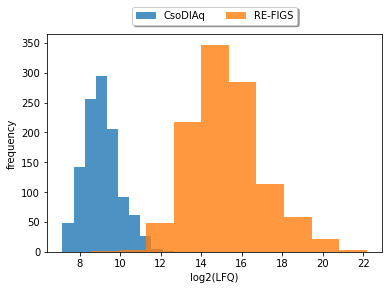

In [15]:
#绘制频数分布直方图
#设置组距
#组数
plt.hist(coeff_csodiaq, 10,label="CsoDIAq",alpha=0.8)
plt.xlabel('log2(LFQ)')
plt.ylabel('frequency')


plt.hist(coeff_REFIGS, 10,label="RE-FIGS",alpha=0.8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=2)
plt.show()


In [16]:
libdir = '../data/lib/'
libname = 'ecolihumanyeast_concat_mayu_IRR_cons_openswath_64var_curated_norm.pkl'
with open(os.path.join(libdir,libname),'rb')as f:
    library = pickle.load(f)

In [17]:
dirname = "../result/"
filenames_A = [
    'CsoDIAq-file1_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_A_1_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
    'CsoDIAq-file2_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_A_2_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
    'CsoDIAq-file3_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_A_3_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
    'CsoDIAq-file4_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_A_4_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
    'CsoDIAq-file5_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_A_5_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
]
filenames_B = [
    'CsoDIAq-file6_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_B_1_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
    'CsoDIAq-file7_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_B_2_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
    'CsoDIAq-file8_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_B_3_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
    'CsoDIAq-file9_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_B_4_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
    'CsoDIAq-file10_480_20210929_noRT_FAIMS_30to80_120ms_40min_250nL_B_5_correctedNoFilter_withFeature_13cycle_5_1_LDA_ID_Coeffs.csv',
]

In [18]:
def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'

In [19]:
total_A = pd.DataFrame([])
for i in range(len(filenames_A)):
    df = pd.read_csv(os.path.join(dirname,filenames_A[i]))
    df['Precursor'] = df[['peptide','charge']].apply(lambda x:x['peptide']+'_'+str(x['charge']),axis=1)
    df['protein'] = df['peptide'].apply(peptide_type)
    df = df[df['protein']=='SAMPLE']
    df = df[df['Coeff']>0]
    df['A'+str(i+1)] = df['Coeff']
    df = df[['Precursor','A'+str(i+1)]]
    if i==0:
        total_A = pd.concat([total_A,df])
    else:
        total_A = total_A.join(df.set_index('Precursor'),on='Precursor',how='outer')

In [20]:
total_B = pd.DataFrame([])
for i in range(len(filenames_B)):
    df = pd.read_csv(os.path.join(dirname,filenames_B[i]))
    df['Precursor'] = df[['peptide','charge']].apply(lambda x:x['peptide']+'_'+str(x['charge']),axis=1)
    df['protein'] = df['peptide'].apply(peptide_type)
    df = df[df['protein']=='SAMPLE']
    df = df[df['Coeff']>0]
    df['B'+str(i+1)] = df['Coeff']
    df = df[['Precursor','B'+str(i+1)]]
    if i==0:
        total_B = pd.concat([total_B,df])
    else:
        total_B = total_B.join(df.set_index('Precursor'),on='Precursor',how='outer')

In [21]:
# # at least 2 identifications in 5 replicates.
# total_A['num_of_nan'] = total_A.T.isna().sum()
# total_A = total_A[total_A['num_of_nan']<=3]
# total_B['num_of_nan'] = total_B.T.isna().sum()
# total_B = total_B[total_B['num_of_nan']<=3]

In [22]:
# at least 4 identifications in 5 replicates.
total_A['num_of_nan'] = total_A.T.isna().sum()
total_A = total_A[total_A['num_of_nan']<=1]
total_B['num_of_nan'] = total_B.T.isna().sum()
total_B = total_B[total_B['num_of_nan']<=1]

In [23]:
def get_avg_A(x):
    coeffs = []
    for i in range(5):
        coeff = x['A'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.mean(coeffs)
def get_CV_A(x):
    coeffs = []
    for i in range(5):
        coeff = x['A'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.std(coeffs)/np.mean(coeffs)
def get_avg_B(x):
    coeffs = []
    for i in range(5):
        coeff = x['B'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.mean(coeffs)
def get_CV_B(x):
    coeffs = []
    for i in range(5):
        coeff = x['B'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.std(coeffs)/np.mean(coeffs)

In [24]:
total_A['peptide'] = total_A['Precursor'].apply(lambda x:x.split('_')[0])
total_A_pep = total_A.groupby('peptide').sum().reset_index()
total_A_pep = total_A_pep.drop('num_of_nan',axis=1)
# total_A_pep['avg'] = total_A_pep[['A1','A2','A3','A4','A5']].apply(get_avg_A,axis=1)
# total_A_pep['Log2'] = np.log2(list(total_A_pep['avg']))


total_B['peptide'] = total_B['Precursor'].apply(lambda x:x.split('_')[0])
total_B_pep = total_B.groupby('peptide').sum().reset_index()
total_B_pep = total_B_pep.drop('num_of_nan',axis=1)
# total_B_pep['avg'] = total_B_pep[['B1','B2','B3','B4','B5']].apply(get_avg_B,axis=1)
# total_B_pep['Log2'] = np.log2(list(total_B_pep['avg']))

In [25]:
total_A_pep

,peptide,A1,A2,A3,A4,A5
0,AAAEVAGQFVIK,25864.563811,24236.068829,30033.721574,31568.625787,27796.446916
1,AAAFEGELIPASQIDR,70166.435619,83262.436605,66210.630310,79189.279761,70802.286395
2,AAALEFLNR,85189.847469,81024.371797,81723.129892,82091.344880,97447.124495
3,AADAEAEVASLNR,73682.766151,75018.912304,78628.371381,85678.965893,66698.629905
4,AADALLLK,114618.626847,111022.917002,124309.639387,102019.624514,172913.847871
...,...,...,...,...,...,...
3814,YWTLTATGGVQSTASSK,21303.247671,19629.673422,20817.479138,21463.494459,16815.464230
3815,YYGGNEHIDR,31037.736870,32338.822038,36511.809081,25940.719676,26316.919611
3816,YYPTEDVPR,90903.345650,50171.842344,58941.359261,45001.663896,47577.092037
3817,YYTSASGDEMVSLK,69668.161316,72280.708983,92023.680181,82433.116153,80166.642320


In [26]:
if len(total_A_pep['peptide'].values)!=len(set(total_A_pep['peptide'].values)):
    print('wrong')
if len(total_B_pep['peptide'].values)!=len(set(total_B_pep['peptide'].values)):
    print('wrong')
pep_A = total_A_pep['peptide'].values
pep_B = total_B_pep['peptide'].values

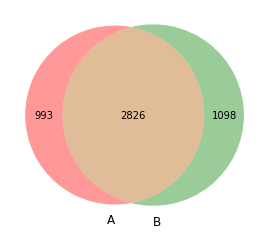

In [27]:
venn2([set(pep_A),set(pep_B)],['A','B'])
plt.show()

In [28]:
intersection = set(pep_A) & set(pep_B)
inter_A = total_A_pep[total_A_pep['peptide'].isin(intersection)]
inter_B = total_B_pep[total_B_pep['peptide'].isin(intersection)]
total = inter_A.join(inter_B.set_index('peptide'),on='peptide',how='outer')
total['avg_A'] = total[['A1','A2','A3','A4','A5']].apply(get_avg_A,axis=1)
total['avg_B'] = total[['B1','B2','B3','B4','B5']].apply(get_avg_B,axis=1)
total['CV_A'] = total[['A1','A2','A3','A4','A5']].apply(get_CV_A,axis=1)
total['CV_B'] = total[['B1','B2','B3','B4','B5']].apply(get_CV_B,axis=1)
old_len = len(total)

In [29]:
def find_label(x):
    charges = [1,2,3,4,5,6,7]
    for charge in charges:
        key = (x,charge)
        if key in library.keys():
            return library[key]['Species']
        else:
            pass
    print('wrong')
    return -1

In [30]:
total['Species'] = total['peptide'].apply(find_label)

In [31]:
species_cnt1 = np.array([len(total[total['Species'] == 'HUMAN']),
                         len(total[total['Species'] == 'YEAS8']),
                         len(total[total['Species'] == 'ECOLI'])])

In [32]:
total = total[total['CV_A']<=0.2]
total = total[total['CV_B']<=0.2]

In [33]:
np.sum(species_cnt1)

2826

In [34]:
labels = ['HUMAN', 'YEAS8', 'ECOLI']
print('        before  after   得率')
print('整体', old_len, len(total), round(len(total) / old_len, 2), sep='\t')
species_cnt2 = np.array([len(total[total['Species'] == label]) for label in labels])
print('HUMAN', species_cnt1[0], species_cnt2[0], (species_cnt2 / species_cnt1).round(2)[0], sep='\t')
print('YEAST', species_cnt1[1], species_cnt2[1], (species_cnt2 / species_cnt1).round(2)[1], sep='\t')
print('ECOLI', species_cnt1[2], species_cnt2[2], (species_cnt2 / species_cnt1).round(2)[2], sep='\t')


        before  after   得率
整体	2826	1975	0.7
HUMAN	1958	1407	0.72
YEAST	450	316	0.7
ECOLI	418	252	0.6


In [35]:
total['LogRatio'] = np.log2(list(np.divide(total['avg_A'], total['avg_B'])))
total['LogB'] = np.log2(list(total['avg_B']))

In [36]:
'''计算accuracy（median absolute deviation）'''
print('median absolute deviation')
for label in labels:
    temp = total[total['Species'] == label]
    tertiles = np.percentile(temp['avg_B'], [100 / 3, 200 / 3])  # logB的2个三分位数

    part1 = temp[temp['avg_B'] < tertiles[0]]
    part2 = temp[temp['avg_B'] >= tertiles[0]]
    part2 = part2[part2['avg_B'] < tertiles[1]]
    part3 = temp[temp['avg_B'] >= tertiles[1]]
    parts = [np.array(part1['LogRatio']), np.array(part2['LogRatio']), np.array(part3['LogRatio'])]

    accuracy = []
    for part in parts:
        median = np.median(part)
        accuracy.append(np.round(np.median(np.abs(part - median)), 3))
    print(label, accuracy, 'mean: ' + str(np.mean(accuracy).round(3)), sep='\t')

median absolute deviation
HUMAN	[0.108, 0.099, 0.079]	mean: 0.095
YEAS8	[0.129, 0.112, 0.117]	mean: 0.119
ECOLI	[0.144, 0.145, 0.104]	mean: 0.131


In [37]:
temp = total[total['Species'] == 'HUMAN']
ratios = temp['LogRatio'].values
print(np.mean(ratios))
a = np.median(ratios)-0
print(np.median(ratios)-0)
print(np.std(ratios)/np.mean(ratios))
print(np.round(np.median(np.abs(ratios - np.mean(ratios))), 3))

0.09548766140124072
0.10827544738207606
1.9108915815020517
0.093


In [38]:
temp = total[total['Species'] == 'YEAS8']
ratios = temp['LogRatio'].values
print(np.mean(ratios))
b = np.median(ratios)-1
print(np.median(ratios)-1)
print(np.std(ratios)/np.mean(ratios))
print(np.round(np.median(np.abs(ratios - np.mean(ratios))), 3))

0.941879364955208
0.0027725077325402303
0.3395739482743694
0.142


In [39]:
temp = total[total['Species'] == 'ECOLI']
ratios = temp['LogRatio'].values
print(np.mean(ratios))
c = np.median(ratios)+2
print(np.median(ratios)+2)
print(np.std(ratios)/np.mean(ratios))
print(np.round(np.median(np.abs(ratios - np.mean(ratios))), 3))

-1.6884142717168629
0.21916132196351445
-0.27263402484390126
0.177


In [40]:
a

0.10827544738207606

In [41]:
b

0.0027725077325402303

In [42]:
c

0.21916132196351445

In [43]:
(a-b+c)/3

0.10822142053768342

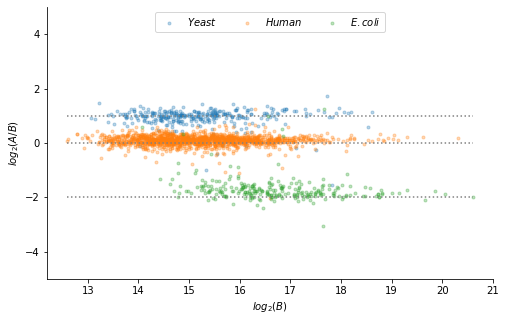

In [44]:
labels = ['$Yeast$', '$Human$', '$E.coli$']
species = ['YEAS8', 'HUMAN', 'ECOLI']
ratios = [1, 0, -2]
# 去掉边框
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(len(species)):
    temp = total[total['Species'] == species[i]]

    plt.scatter(temp['LogB'], temp['LogRatio'], marker='.', label=labels[i],alpha = 0.3)
    plt.hlines(y=ratios[i], xmin=min(total['LogB']), xmax=max(total['LogB']), linestyles=':',
               color='gray')  # 水平线：hlines(y, xmin, xmax) 竖直线：vlines(x, ymin, ymax)

plt.xlabel("$log_2(B)$")
plt.ylabel("$log_2(A/B)$")
# plt.xlim((10,25))
plt.ylim((-5, 5))
plt.legend(ncol=3, loc='upper center')  # 图例
plt.show()
#plt.savefig('HYE124_ratio.png')

In [45]:
'''计算accuracy（median absolute deviation）'''
labels = ['HUMAN', 'YEAS8', 'ECOLI']
print('median absolute deviation')
for label in labels:
    temp = total[total['Species'] == label]
    tertiles = np.percentile(temp['avg_B'], [100 / 3, 200 / 3])  # logB的2个三分位数

    part1 = temp[temp['avg_B'] < tertiles[0]]
    part2 = temp[temp['avg_B'] >= tertiles[0]]
    part2 = part2[part2['avg_B'] < tertiles[1]]
    part3 = temp[temp['avg_B'] >= tertiles[1]]
    parts = [np.array(part1['LogRatio']), np.array(part2['LogRatio']), np.array(part3['LogRatio'])]

    accuracy = []
    for part in parts:
        median = np.median(part)
        accuracy.append(np.round(np.median(np.abs(part - median)), 3))
    print(label, accuracy, 'mean: ' + str(np.mean(accuracy).round(3)), sep='\t')

median absolute deviation
HUMAN	[0.108, 0.099, 0.079]	mean: 0.095
YEAS8	[0.129, 0.112, 0.117]	mean: 0.119
ECOLI	[0.144, 0.145, 0.104]	mean: 0.131


In [46]:
label = 'YEAS8'
temp = total[total['Species'] == label]
tertiles = np.percentile(temp['avg_B'], [100 / 3, 200 / 3])  # logB的2个三分位数

part1 = temp[temp['avg_B'] < tertiles[0]]
part2 = temp[temp['avg_B'] >= tertiles[0]]
part2 = part2[part2['avg_B'] < tertiles[1]]
part3 = temp[temp['avg_B'] >= tertiles[1]]

In [47]:
names = locals()
labels = ['HUMAN', 'YEAS8', 'ECOLI']
for label in labels:
    temp = total[total['Species'] == label]
    tertiles = np.percentile(temp['avg_B'], [100 / 3, 200 / 3])  # logB的2个三分位数

    part1 = temp[temp['avg_B'] < tertiles[0]]
    part2 = temp[temp['avg_B'] >= tertiles[0]]
    part2 = part2[part2['avg_B'] < tertiles[1]]
    part3 = temp[temp['avg_B'] >= tertiles[1]]

    for i in range(1,4):
        names[label+str(i)] = np.histogram(names['part'+str(i)]['LogRatio'].values,bins=np.linspace(-4.5,3.5,9))[0]
        names[label+str(i)] = names[label+str(i)][::-1]
        names[label+str(i)] = names[label+str(i)]/np.sum(names[label+str(i)])*100

In [48]:
names[label+str(i)][::-1]

array([ 0.        ,  1.19047619, 90.47619048,  7.14285714,  0.        ,
        1.19047619,  0.        ,  0.        ])

In [49]:
names = locals()
labels = ['HUMAN', 'YEAS8', 'ECOLI']
for label in labels:
    temp = total[total['Species'] == label]
    names[label] = np.histogram(temp['LogRatio'].values,bins=np.linspace(-4.5,3.5,9))[0]
    names[label] = names[label][::-1]
    names[label] = names[label]/np.sum(names[label])*100

In [50]:
np.linspace(-4.5,3.5,9)

array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

In [51]:
data = [YEAS81,YEAS82,YEAS83,YEAS8,HUMAN1,HUMAN2,HUMAN3,HUMAN,ECOLI1,ECOLI2,ECOLI3,ECOLI]

In [52]:
data = np.array(data).T

In [53]:
data.shape

(8, 12)

In [54]:
row_label = ["[-4.5,-3.5)","[-3.5,-2.5)","[-2.5,-1.5)","[-1.5,-0.5)","[-0.5,0.5)","[0.5,1.5)","[1.5,2.5)","[2.5,3.5]"]
row_label = row_label[::-1]
col_label = [
    'YEAST_lower','YEAST_middle','YEAST_upper','YEAST',
    'HUMAN_lower','HUMAN_middle','HUMAN_upper','HUMAN',
    'ECOLI_lower','ECOLI_middle','ECOLI_upper','ECOLI'
]

In [55]:
def heatmap(data, row_labels,col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax,fraction=0.030, pad=0.04, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)
    ax.set_yticks(np.arange(data.shape[0]))

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

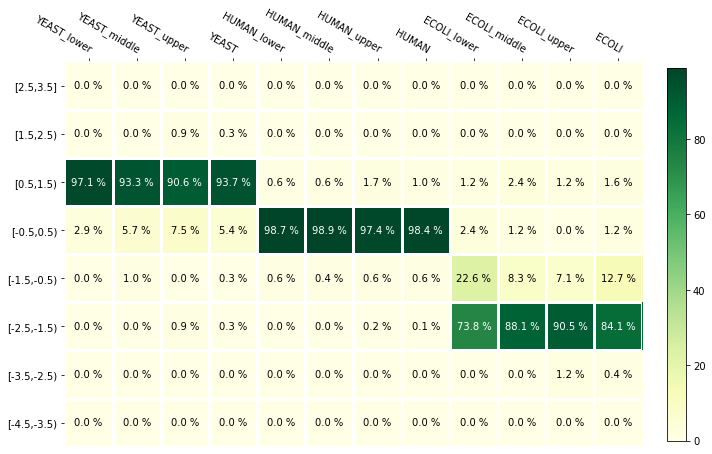

In [56]:
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(data, row_label,col_label, ax=ax,
                   cmap="YlGn")

texts = annotate_heatmap(im, valfmt="{x:.1f} %")

fig.tight_layout()
plt.show()

Text(2.5, 5.0, 'b')

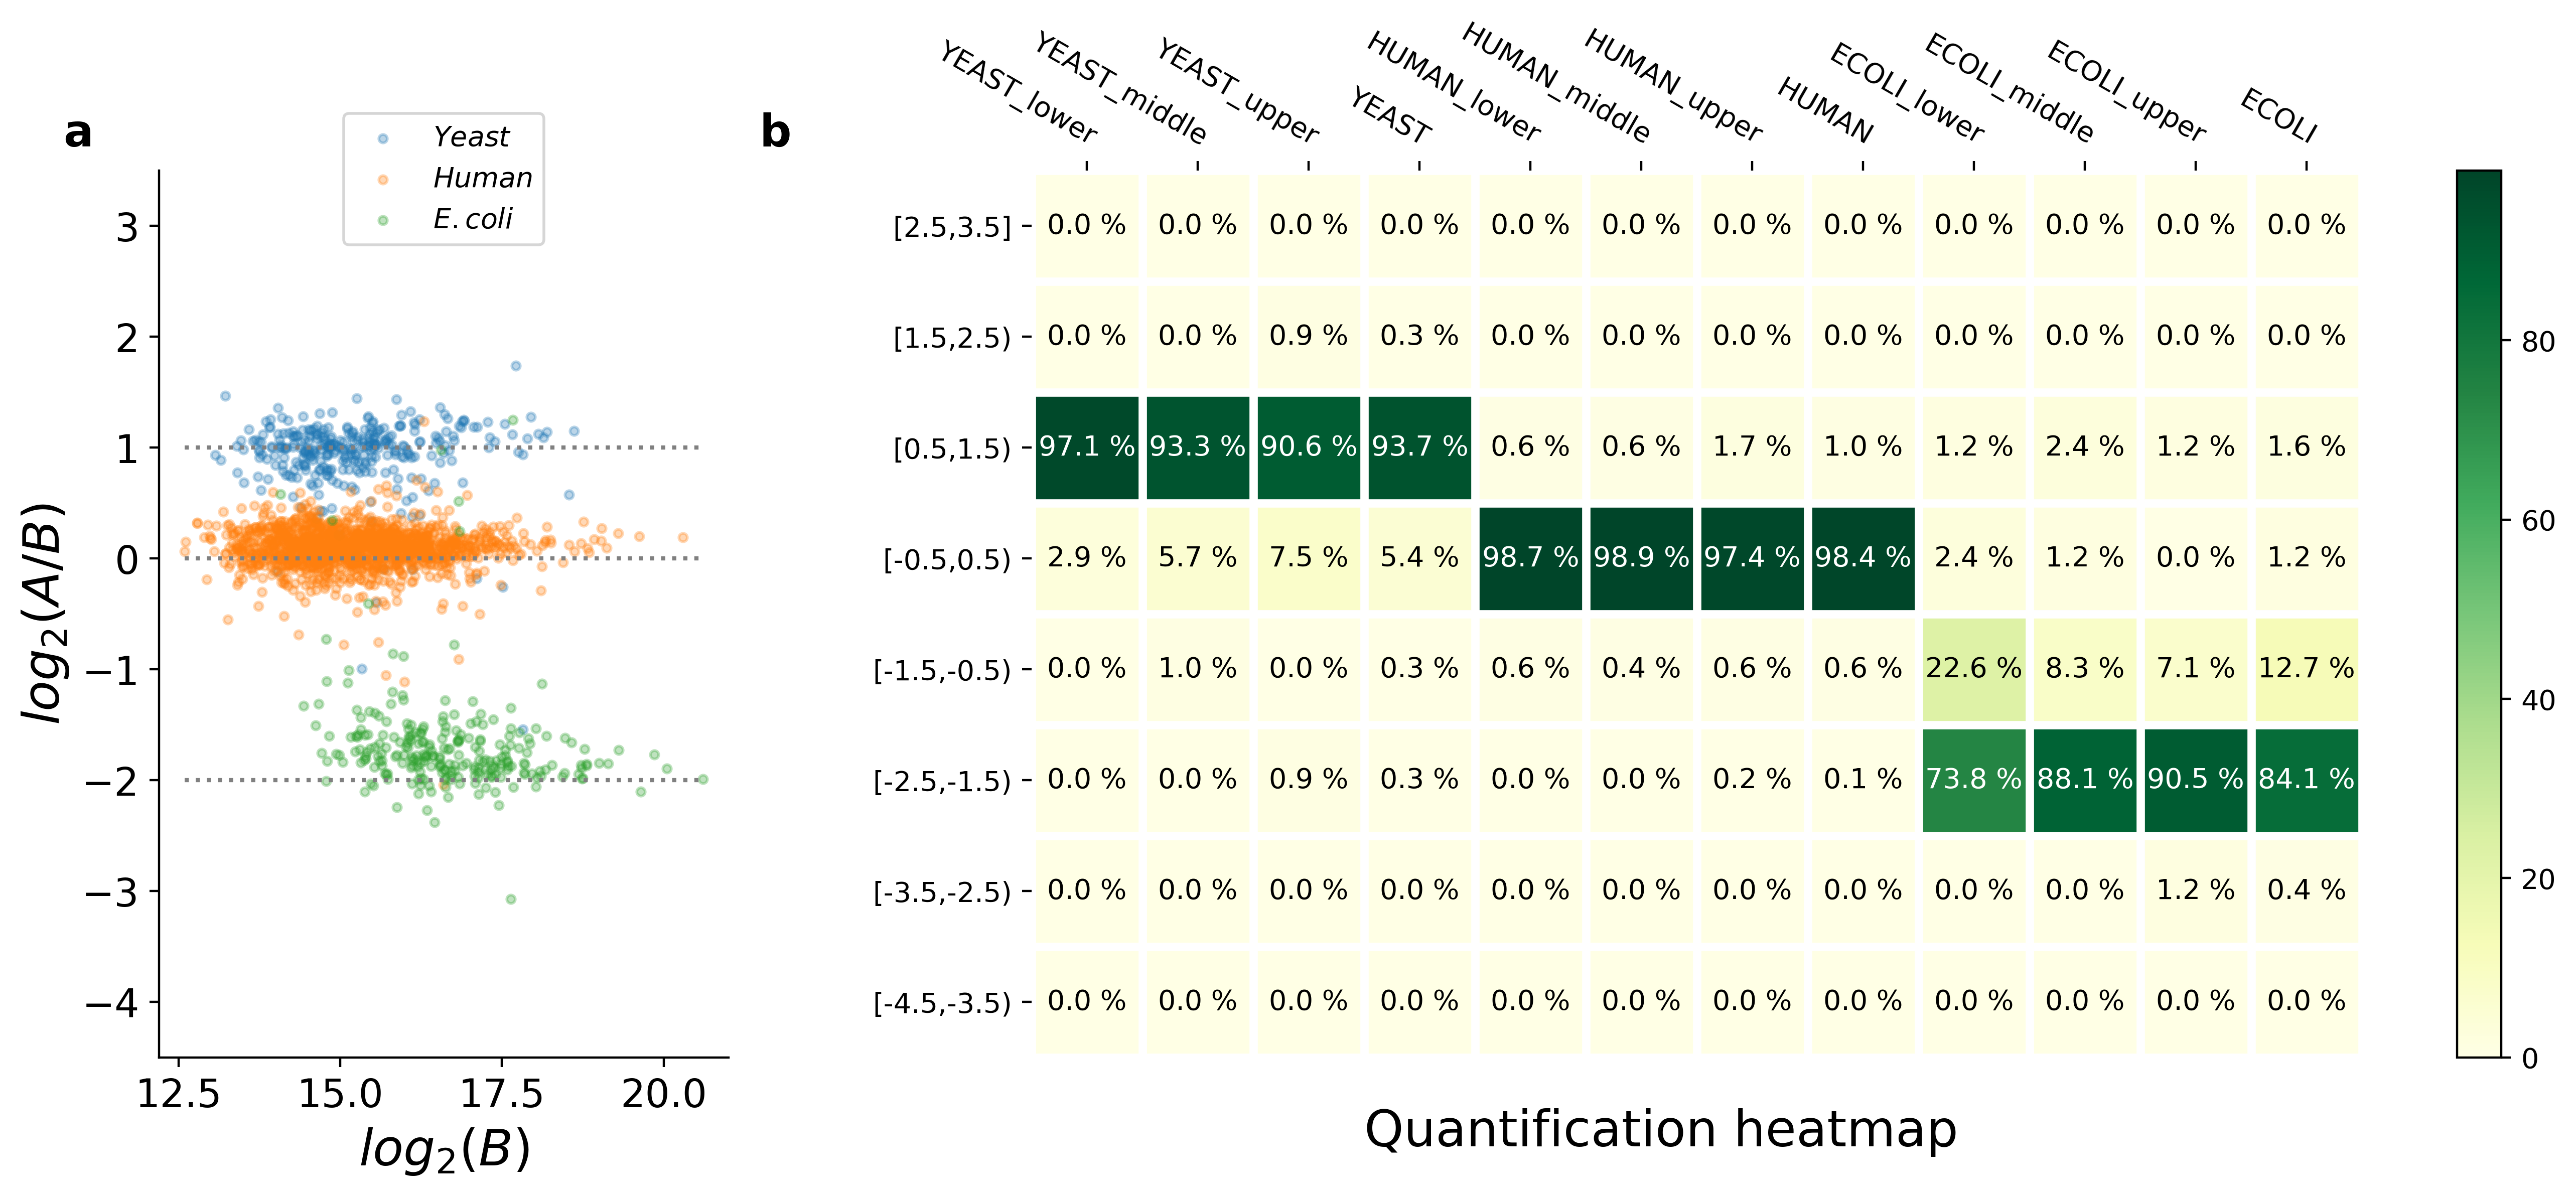

In [57]:
fig = plt.figure(figsize=(13,7),dpi=400)
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,1,1)

labels = ['$Yeast$', '$Human$', '$E.coli$']
species = ['YEAS8', 'HUMAN', 'ECOLI']
ratios = [1, 0, -2]
# 去掉边框
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

for i in range(len(species)):
    temp = total[total['Species'] == species[i]]

    ax1.scatter(temp['LogB'], temp['LogRatio'], marker='.', label=labels[i],alpha = 0.3)
    ax1.hlines(y=ratios[i], xmin=min(total['LogB']), xmax=max(total['LogB']), linestyles=':',
               color='gray')  # 水平线：hlines(y, xmin, xmax) 竖直线：vlines(x, ymin, ymax)

    
ax1.set_xlabel("$log_2(B)$",fontsize=18)
ax1.set_ylabel("$log_2(A/B)$",fontsize=18)
ax1.tick_params(labelsize=14)

ax1.set_ylim((-4.5, 3.5))
ax1.legend(ncol=1, loc='upper center', bbox_to_anchor=(0.5, 1.08))  # 图例
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11),fancybox=True, shadow=True, ncol=3,fontsize=14)
ax1.text(0.1, 5.0, 'a', transform=ax.transAxes, size=16, weight='bold')
####################
im, cbar = heatmap(data, row_label,col_label, ax=ax2,
                   cmap="YlGn")

texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax2.text(0.25, -0.1, 'Quantification heatmap', transform=ax2.transAxes, size=18)
fig.tight_layout()


    # ax.imshow(np.random.randn(10,10), interpolation='none')    
ax2.text(2.5, 5.0, 'b', transform=ax.transAxes, size=16, weight='bold')
# plt.savefig('supplement6.jpg')

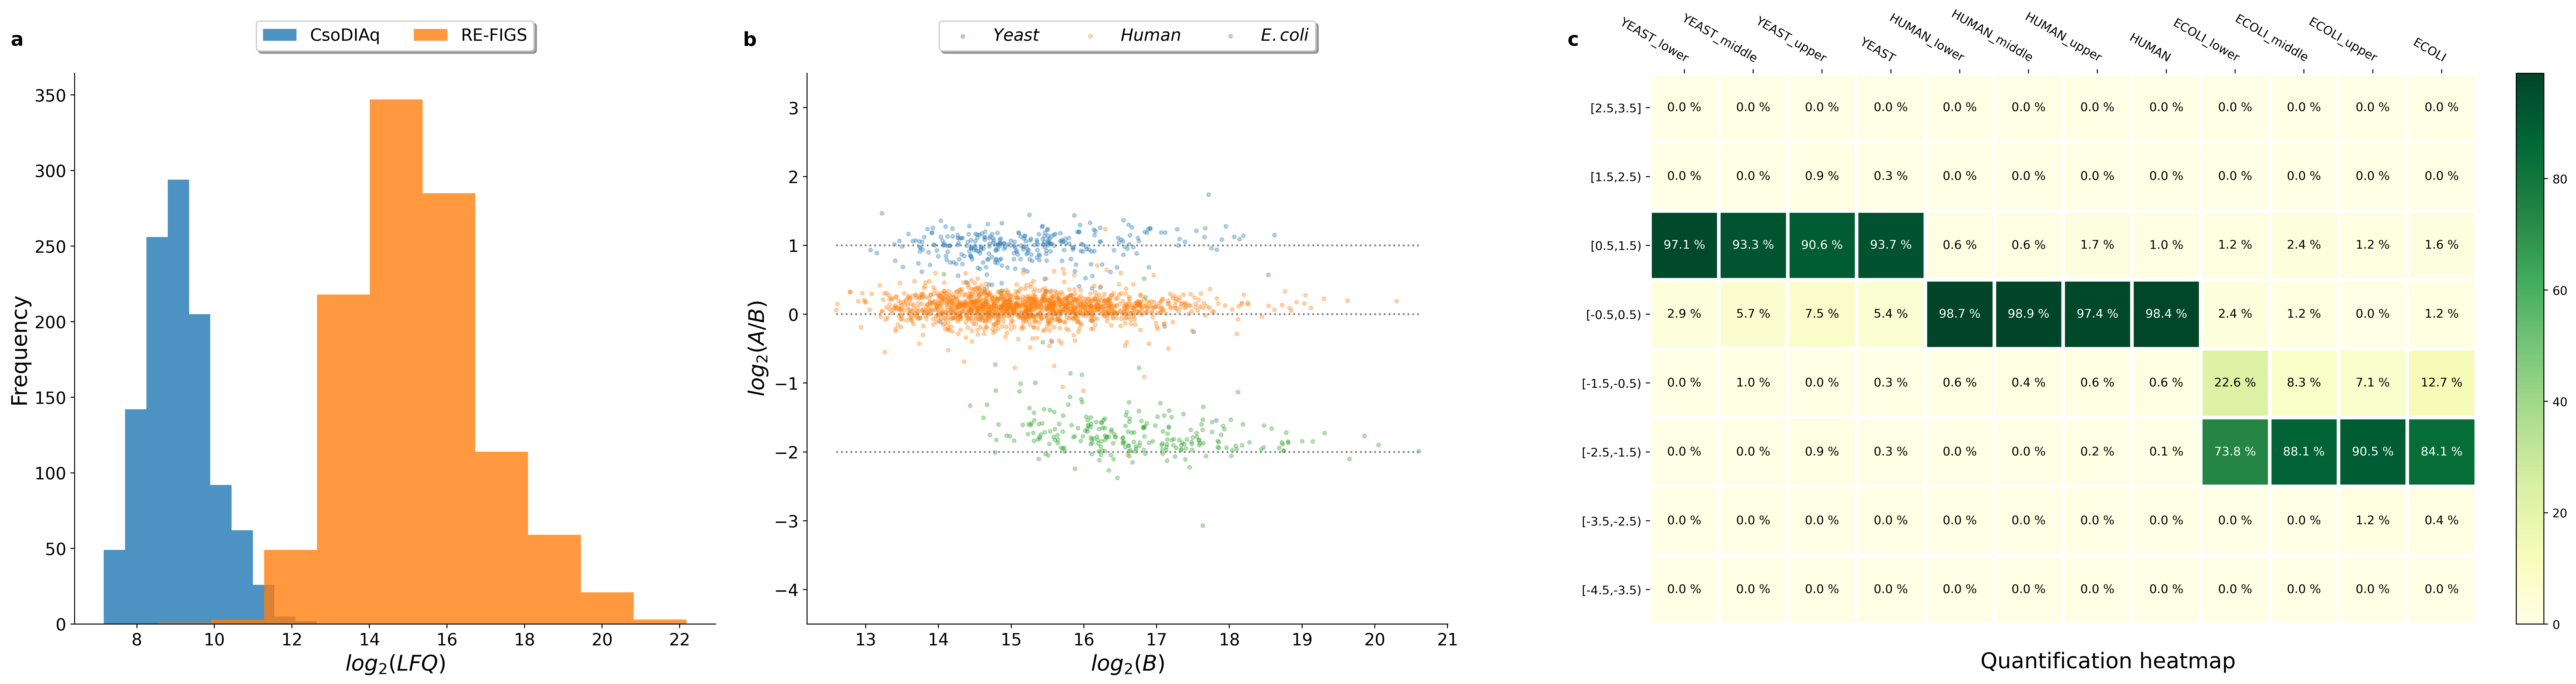

In [58]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(30,8),dpi=400)
grid = gridspec.GridSpec(1, 7)
ax1 = fig.add_subplot(grid[0,0:2])
ax2 = fig.add_subplot(grid[0,2:4])
ax3 = fig.add_subplot(grid[0,4:])


ax1.hist(coeff_csodiaq, 10,label="CsoDIAq",alpha=0.8)
ax1.set_xlabel('$log_2(LFQ)$',fontsize=18)
ax1.set_ylabel('Frequency',fontsize=18)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=14)

ax1.hist(coeff_REFIGS, 10,label="RE-FIGS",alpha=0.8)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11),fancybox=True, shadow=True, ncol=2,fontsize=14)
ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, size=16, weight='bold')

###################
labels = ['$Yeast$', '$Human$', '$E.coli$']
species = ['YEAS8', 'HUMAN', 'ECOLI']
ratios = [1, 0, -2]
# 去掉边框
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

for i in range(len(species)):
    temp = total[total['Species'] == species[i]]

    ax2.scatter(temp['LogB'], temp['LogRatio'], marker='.', label=labels[i],alpha = 0.3)
    ax2.hlines(y=ratios[i], xmin=min(total['LogB']), xmax=max(total['LogB']), linestyles=':',
               color='gray')  # 水平线：hlines(y, xmin, xmax) 竖直线：vlines(x, ymin, ymax)

    
ax2.set_xlabel("$log_2(B)$",fontsize=18)
ax2.set_ylabel("$log_2(A/B)$",fontsize=18)
ax2.tick_params(labelsize=14)

ax2.set_ylim((-4.5, 3.5))
# ax2.legend(ncol=1, loc='upper center', bbox_to_anchor=(0.5, 1.08))  # 图例
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11),fancybox=True, shadow=True, ncol=3,fontsize=14)
ax2.text(-0.1, 1.05, 'b', transform=ax2.transAxes, size=16, weight='bold')


####################
im, cbar = heatmap(data, row_label,col_label, ax=ax3,
                   cmap="YlGn")
fig.tight_layout()
texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax3.text(0.4, -0.08, 'Quantification heatmap', transform=ax3.transAxes, size=18)
ax3.text(-0.1, 1.05, 'c', transform=ax3.transAxes, size=16, weight='bold')
plt.savefig('fig6.jpg')